In [65]:
%matplotlib inline
from IPython.display import HTML, display, IFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [4]:
dataset_path = 'Datasets/Map-Crime_Incidents-Previous_Three_Months.csv'
SF = pd.read_csv(dataset_path)

In [5]:
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


In [6]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

In [7]:
del SF['IncidntNum']
SF.drop('Location', axis=1, inplace=True)

In [8]:
CountCategory = SF['Category'].value_counts()
print(CountCategory)

LARCENY/THEFT                  8205
OTHER OFFENSES                 4004
NON-CRIMINAL                   3653
ASSAULT                        2518
VEHICLE THEFT                  1885
VANDALISM                      1611
WARRANTS                       1583
DRUG/NARCOTIC                  1292
BURGLARY                       1257
MISSING PERSON                 1135
ROBBERY                         862
SUSPICIOUS OCC                  682
FRAUD                           574
WEAPON LAWS                     322
TRESPASS                        259
DRUNKENNESS                     142
KIDNAPPING                      128
SEX OFFENSES, FORCIBLE          123
DRIVING UNDER THE INFLUENCE      93
FORGERY/COUNTERFEITING           88
DISORDERLY CONDUCT               69
RUNAWAY                          61
ARSON                            60
PROSTITUTION                     44
LIQUOR LAWS                      38
EMBEZZLEMENT                     19
SUICIDE                          14
FAMILY OFFENSES             

In [9]:
SF['Category'].value_counts(ascending=False)

LARCENY/THEFT                  8205
OTHER OFFENSES                 4004
NON-CRIMINAL                   3653
ASSAULT                        2518
VEHICLE THEFT                  1885
VANDALISM                      1611
WARRANTS                       1583
DRUG/NARCOTIC                  1292
BURGLARY                       1257
MISSING PERSON                 1135
ROBBERY                         862
SUSPICIOUS OCC                  682
FRAUD                           574
WEAPON LAWS                     322
TRESPASS                        259
DRUNKENNESS                     142
KIDNAPPING                      128
SEX OFFENSES, FORCIBLE          123
DRIVING UNDER THE INFLUENCE      93
FORGERY/COUNTERFEITING           88
DISORDERLY CONDUCT               69
RUNAWAY                          61
ARSON                            60
PROSTITUTION                     44
LIQUOR LAWS                      38
EMBEZZLEMENT                     19
SUICIDE                          14
FAMILY OFFENSES             

In [10]:
print(SF['PdDistrict'].value_counts())

SOUTHERN      6185
MISSION       4011
CENTRAL       3867
NORTHERN      3205
BAYVIEW       2970
INGLESIDE     2613
TENDERLOIN    2449
TARAVAL       2038
PARK          1800
RICHMOND      1622
Name: PdDistrict, dtype: int64


In [11]:
print(len(SF[SF['Month'] == 8]))

9720


In [12]:
print((SF[SF['Month'] == 8]['Category'] == 'BURGLARY').value_counts())

False    9347
True      373
Name: Category, dtype: int64


In [13]:
BurglaryAug = SF.query('Month == 8 and Category == "BURGLARY"')

In [14]:
Crime0704 = SF.query('Month == 7 and Day == 4')

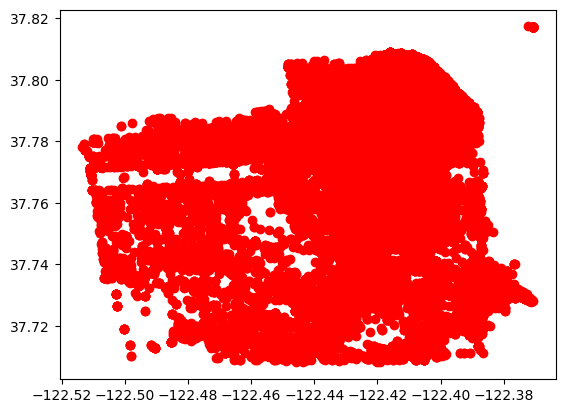

In [15]:
plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()

In [16]:
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [17]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda z: pd_districts_levels[z])
SF['PdDistrictCode']

0        1
1        1
2        1
3        3
4        4
        ..
30755    7
30756    4
30757    9
30758    1
30759    2
Name: PdDistrictCode, Length: 30760, dtype: int64

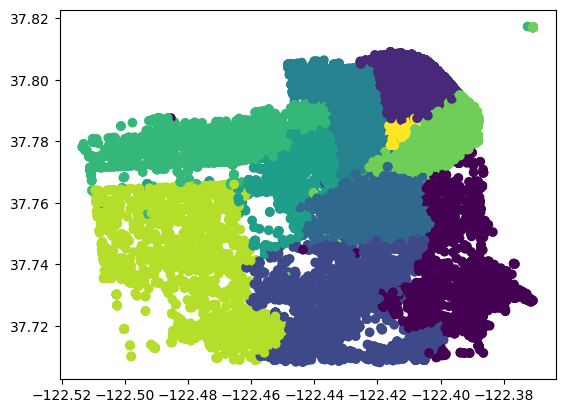

In [18]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

In [19]:
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [20]:
color_dict = dict(zip(districts, list(colors.cnames.values())[:-1:len(districts)]))
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [ ]:
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start=12)
plotEvery = 25
obs = list(zip(SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[:-1:plotEvery]:
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2], radius=5).add_to(map_osm)


In [76]:
map_osm

Criando mapa com a cor de acordo com o tipo de crime:

In [51]:
crimes = np.unique(SF['Category'])

In [52]:
crimes_colors = dict(zip(crimes, list(colors.cnames.values())[::len(colors.cnames.values())//len(crimes)]))

In [53]:
mapCrimes = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start=12)
plotEvery = 10
points = list(zip(SF['Y'], SF['X'], SF['Category']))

for pt in points[::plotEvery]:
    folium.CircleMarker(pt[0:2], color=crimes_colors[pt[2]], fill_color=pt[2], radius=5).add_to(mapCrimes)

In [63]:
mapCrimes